# Prosper Loan Data Exploration
## Preliminary Wrangling
This data set contains 113,937 loans with 81 variables on each loan.

In [1]:
#import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

dataset = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition

print(dataset.shape)
print(dataset.dtypes)
dataset.head(3)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   
2         0.275        0.240  ...          -24.20                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  

[3 rows x 81 columns]

## Select smaller dataframe from the original dataset
This new dataframe explores a dataset containing prices and attributes for approximately 113,937 loans.

In [4]:
#dataframe called df to be used

df = dataset[['LoanNumber', 'LoanOriginationDate', 'LoanOriginalAmount', 'LoanStatus', 'Term', 'BorrowerAPR', 'BorrowerRate',
              'EstimatedLoss', 'EstimatedReturn', 'IncomeRange', 'IsBorrowerHomeowner',
              'CurrentDelinquencies', 'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent']]

In [5]:
#overview of data shape and composition

print(df.shape)
print(df.dtypes)
df.head()

(113937, 14)
LoanNumber                     int64
LoanOriginationDate           object
LoanOriginalAmount             int64
LoanStatus                    object
Term                           int64
BorrowerAPR                  float64
BorrowerRate                 float64
EstimatedLoss                float64
EstimatedReturn              float64
IncomeRange                   object
IsBorrowerHomeowner             bool
CurrentDelinquencies         float64
MonthlyLoanPayment           float64
LoanCurrentDaysDelinquent      int64
dtype: object


LoanNumber  LoanOriginationDate  LoanOriginalAmount LoanStatus  Term  \
0       19141  2007-09-12 00:00:00                9425  Completed    36   
1      134815  2014-03-03 00:00:00               10000    Current    36   
2        6466  2007-01-17 00:00:00                3001  Completed    36   
3       77296  2012-11-01 00:00:00               10000    Current    36   
4      102670  2013-09-20 00:00:00               15000    Current    36   

   BorrowerAPR  BorrowerRate  EstimatedLoss  EstimatedReturn     IncomeRange  \
0      0.16516        0.1580            NaN              NaN  $25,000-49,999   
1      0.12016        0.0920         0.0249          0.05470  $50,000-74,999   
2      0.28269        0.2750            NaN              NaN   Not displayed   
3      0.12528        0.0974         0.0249          0.06000  $25,000-49,999   
4      0.24614        0.2085         0.0925          0.09066       $100,000+   

   IsBorrowerHomeowner  CurrentDelinquencies  MonthlyLoanPayment  \
0                 True                   2.0              330.43   
1                False                   0.0              318.93   
2                False                   1.0              123.32   
3                 True                   4.0              321.45   
4                 True                   0.0              563.97   

   LoanCurrentDaysDelinquent  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [6]:
# Select only data after July 2009
# to detect Estimated Return without null values
# df will contain 84,964 loans.

df = df.query("LoanOriginationDate > '2009-07-31 00:00:00'")
df.shape

(84964, 14)

In [7]:
# Converting datatype of Term to string as it only has 3 cases (12, 36, 60)

df['Term'] = df.Term.astype(str)
df['IsBorrowerHomeowner'] = df.IsBorrowerHomeowner.astype(str)

In [8]:
# show LoanStatus values

df.LoanStatus.value_counts()

Current                   56576
Completed                 19768
Chargedoff                 5341
Defaulted                  1007
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [9]:
# Set all Past Due periods under the same name 'Past Due'

df.LoanStatus.replace({'Past Due (1-15 days)' : 'Past Due', 'Past Due (16-30 days)' : 'Past Due', 'Past Due (31-60 days)' : 'Past Due', 
                       'Past Due (61-90 days)' : 'Past Due', 'Past Due (91-120 days)' : 'Past Due', 'Past Due (>120 days)' : 'Past Due'}, inplace=True)
df.LoanStatus.value_counts()

Current                   56576
Completed                 19768
Chargedoff                 5341
Past Due                   2067
Defaulted                  1007
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

In [10]:
# convert LoanStatus, IncomeRange and Term into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed','Chargedoff', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Past Due'],
                    'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed'], 
                    'Term': ['12', '36', '60']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [11]:
# descriptive statistics for numeric variables

df.describe()

LoanNumber  LoanOriginalAmount   BorrowerAPR  BorrowerRate  \
count   84964.000000        84964.000000  84964.000000  84964.000000   
mean    86533.288181         9077.376006      0.226603      0.195976   
std     28914.830500         6287.128429      0.079943      0.074653   
min     38063.000000         1000.000000      0.045830      0.040000   
25%     60864.750000         4000.000000      0.163240      0.135900   
50%     87733.500000         7500.000000      0.219450      0.187500   
75%    109069.250000        13500.000000      0.292540      0.257400   
max    136486.000000        35000.000000      0.423950      0.360000   

       EstimatedLoss  EstimatedReturn  CurrentDelinquencies  \
count   84837.000000     84837.000000          84964.000000   
mean        0.080307         0.096070              0.322254   
std         0.046755         0.030399              1.110550   
min         0.004900        -0.182700              0.000000   
25%         0.042400         0.074080              0.000000   
50%         0.072400         0.091700              0.000000   
75%         0.112000         0.116600              0.000000   
max         0.366000         0.283700             51.000000   

       MonthlyLoanPayment  LoanCurrentDaysDelinquent  
count        84964.000000               84964.000000  
mean           291.754773                  36.646285  
std            186.667933                 150.471354  
min              0.000000                   0.000000  
25%            157.300000                   0.000000  
50%            251.760000                   0.000000  
75%            388.280000                   0.000000  
max           2251.510000                1593.000000

### What is the structure of your dataset?

There are 84,964 loans in the dataset with 14 features (LoanNumber, LoanOriginationDate, LoanOriginalAmount, LoanStatus, Term, BorrowerAPR, BorrowerRate, EstimatedLoss, EstimatedReturn, IncomeRange, IsBorrowerHomeowner, CurrentDelinquencies, MonthlyLoanPayment, LoanCurrentDaysDelinquent). Most variables are numeric in nature, but the variables LoanStatus, IncomeRange and Term are ordered factor variables with the following levels.

(best) ——> (worst) <br>
LoanStatus: Completed, Chargedoff, Current, FinalPaymentInProgress, Defaulted, Past Due <br>
IncomeRange: 100,000+, 75,000-99,999, 50,000-74,999, 25,000-49,999, 1-24,999, 0, Not employed <br>
Term: 12, 36, 60 <br>

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the Estimated Return of the loans in the dataset and the factors affect a loan’s status and amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that LoanOriginalAmount, BorrowerAPR, Term and IncomeRange will have the strongest effect on the Estimated Return of the loan: the larger the BorrowerAPR and IncomeRange, the higher the Estimated Return.
## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: EstimatedReturn.

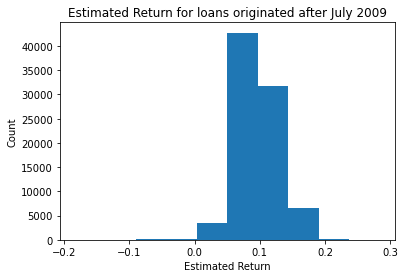

In [12]:
# start with a standard-scaled plot 

df.EstimatedReturn.plot(kind='hist')
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title("Estimated Return for loans originated after July 2009");

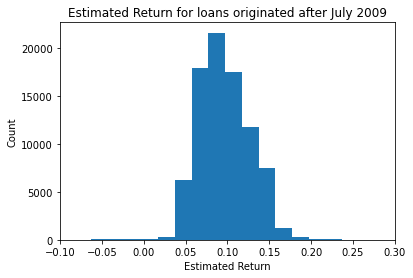

In [13]:
# Get the ticks for bins between [min-max], at an interval of 0.02
# we need to trim the plot by setting the upper and lower bounds of the bins that are displayed using xlim fun.

bins = np.arange(df['EstimatedReturn'].min(), df['EstimatedReturn'].max()+0.02, 0.02)
df.EstimatedReturn.plot(kind='hist', bins=bins)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title("Estimated Return for loans originated after July 2009")
plt.xlim((-0.1,0.3));

EstimatedRetun approximately seemed like a normal distribution, which has mean equal to the mode and median of the data set, which are around 0.1.

Next up, the first predictor variable of interest: LoanOriginalAmount.

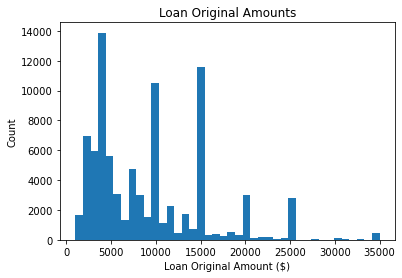

In [14]:
plt.hist(data=df, x='LoanOriginalAmount', bins=40)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title("Loan Original Amounts");

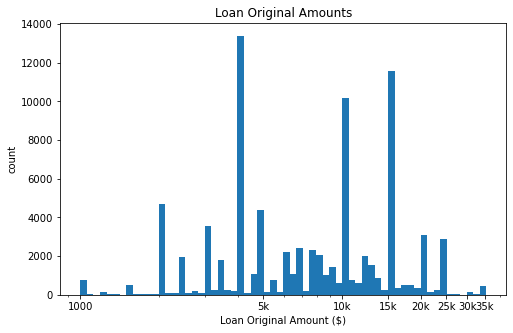

In [15]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 5e3, 10e3, 15e3, 2e4, 2.5e4, 3e4, 3.5e4], [1000, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.title('Loan Original Amounts')
plt.show()

For the LoanOriginalAmount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 3,750, 10,000, 15,000); frequency quickly trails off until the next spike.

I'll now move on to both Terms and IncomeRange variables in the dataset.

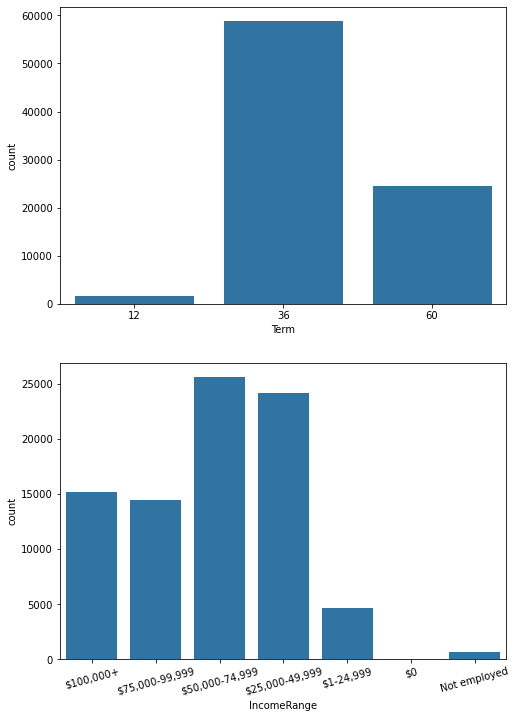

In [16]:
# let's plot both together to get an idea of each categorical variable's distribution.

fig, ax = plt.subplots(nrows=2, figsize = [8,12])

default_color = sb.color_palette()[0]

sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0])

sb.countplot(data = df, x = 'IncomeRange', color = default_color, ax = ax[1])
plt.xticks(rotation=15)

plt.show()

The most common Term was used in the dataset 36 month then 60 and a bit used 12 month.

Most of the loans are also for those who have medium income range btween 25,000 and 70,000 dollars after that for higher income.

I'll now look at the other features in the data to see if any of them hold interesting properties.

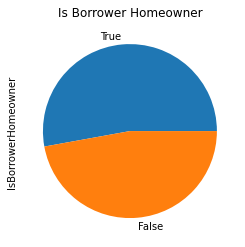

In [17]:
#Univariate Exploration -- If borrower is homeowner which approximatly equal

df.IsBorrowerHomeowner.value_counts().plot(kind='pie',title='Is Borrower Homeowner');

Bar chart identify that ratio between borrowers who own home and who don't is close to 1.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanOriginalAmount variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data has three large peaks at (3,750, 10,000, 15,000) dollars.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Term variable, its datatype was int although it contains only 3 values (12, 36, 60) so converting datatype to string makes it easy to be the analyzed as a categorical.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

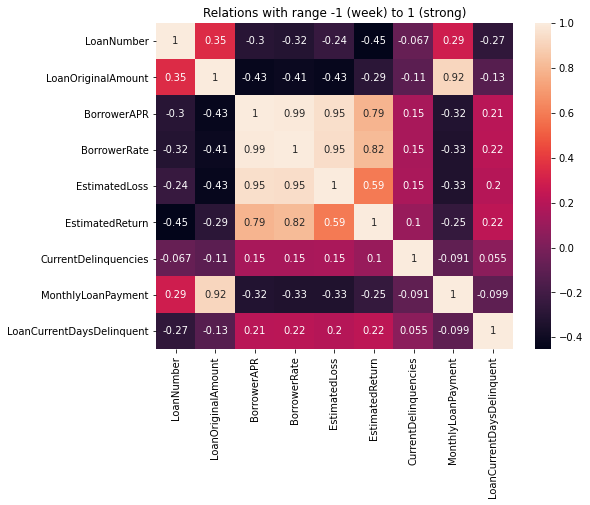

In [18]:
# Starting with correlation plot using heatmap for the Quantitative data

plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot=True)
plt.title('Relations with range -1 (week) to 1 (strong)');

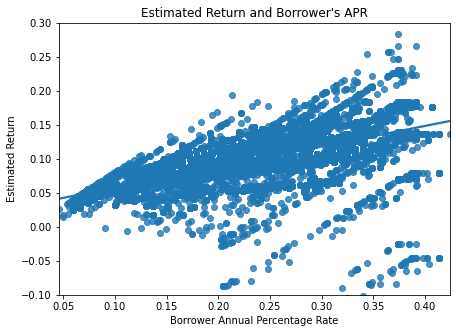

In [19]:
#Bivariate Exploration -- Using regplot plot to find the relation btween two Quantitative variables
#                         BorrowAPR and EstimatedReturn which are strongly correlated

plt.figure(figsize=(7,5))
sb.regplot(data = df, x = 'BorrowerAPR', y = 'EstimatedReturn');
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Estimated Return')
plt.title("Estimated Return and Borrower's APR")
plt.ylim(-0.1,0.3);

This strongly correlated plot suggests that for the Borrower APR less than 20% this grantee no estimated loss and for cases larger than 20% may cause loss to -0.1 in estimated return and may cause gain up to 0.3 too.

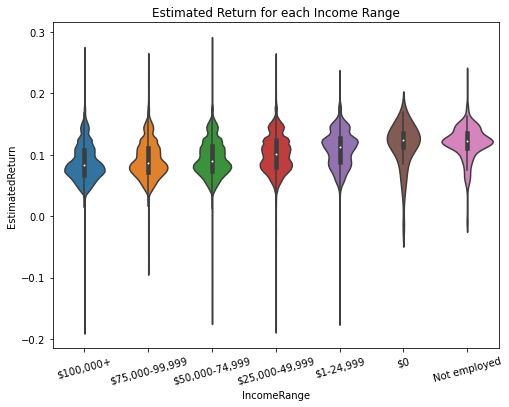

In [20]:
#Bivariate Exploration -- Use Violin plot to demonstrate the data at different levels of income range
# plot the categorical variable 'IncomeRange' against EstimatedReturn

plt.figure(figsize=(8,6))
sb.violinplot(data=df, x='IncomeRange', y='EstimatedReturn', innner=None)
plt.xticks(rotation=15)
plt.title('Estimated Return for each Income Range');

The EstimatedReturn for who Not Employed or have low income is much higher than who have large income, that may mean that low income make people more interest getting loan to start their own business.

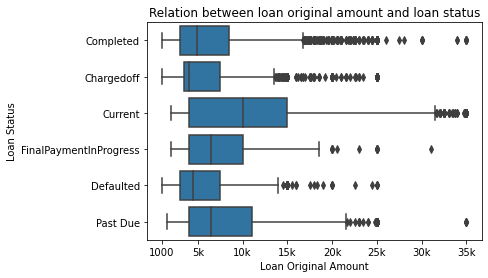

In [21]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df, y='LoanStatus', x='LoanOriginalAmount', color=base_color)
plt.xlabel('Loan Original Amount')
plt.xticks([1000, 5e3, 10e3, 15e3, 2e4, 2.5e4, 3e4, 3.5e4], [1000, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.ylabel('Loan Status')
plt.title('Relation between loan original amount and loan status');

Using box plot here clarified that the count median of current loans in data set have the larget original amount about 10K and the count mendian of chargedoff loans have the smallest which considerd amounts below 5K.

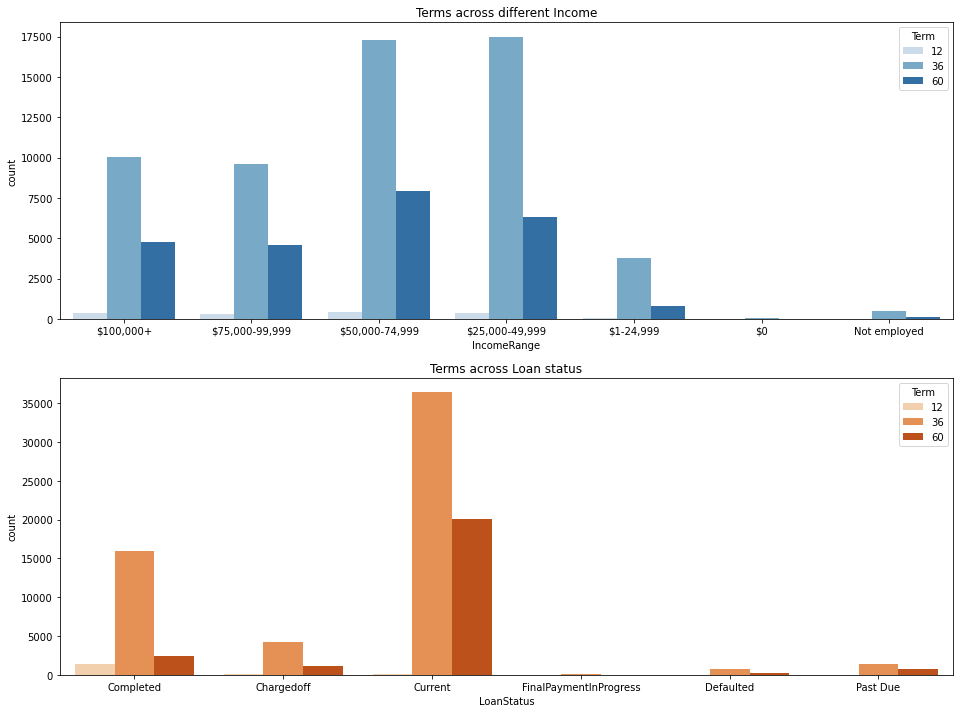

In [22]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [16, 12])

# subplot 1: IncomeRange vs Term
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Blues')
plt.title('Terms across different Income')

# subplot 2: LoanStatus vs. Term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = 'Oranges')
plt.legend(title= 'Term', ncol = 1) # re-arrange legend to reduce overlapping
plt.title('Terms across Loan status')

plt.show()

As shown before, the most popular term in the data set 36 month, here which appeared used by who have medium income and current loans.

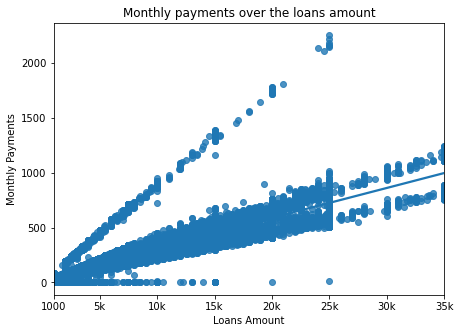

In [23]:
plt.figure(figsize=(7,5))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment')
plt.xlabel('Loans Amount')
plt.xticks([1000, 5e3, 10e3, 15e3, 2e4, 2.5e4, 3e4, 3.5e4], [1000, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.ylabel('Monthly Payments')
plt.title("Monthly payments over the loans amount");

Expected relationship between the loans amount and monthly payment identified the strong correlation between both of them: the larger amount of loan, the higher monthly payment.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Estimated return showed a strong correlation with both BorrowerAPR and BorrowerRate by heatmap. An approximately linear relationship was observed when Estimated return was plotted with BorrowerAPR. The Violin plot demonstrated the data at different levels of income range plotted across the Estimated Return which was much higher for who Not Employed or have low income than who have large income, that may mean that low income make people more interest getting loan to start their own business. One of the potentially major interacting factors is the effect of the two other categorical Loan Status and Terms levels on the Estimated Return. This will have to be explored further in the next section.

For Loan Original Amount, there was also an interesting relationship observed with the Loan Status. That the current loans covered most of amounts in the data set with the higher median of amount than other loan status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found between the Monthly Payment of loans and Loan Original Amount to identify the strong correlation: the larger loan amountm the higher monthlt payment is required.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical measures of term and the loan status affect on the Estimated Return.

In [24]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Estimated Return across the Loan status and Terms')
plt.ylabel('Estimated Return')
plt.xlabel('Loan Status')
plt.show();

C:\Users\Sarah Hamdy\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


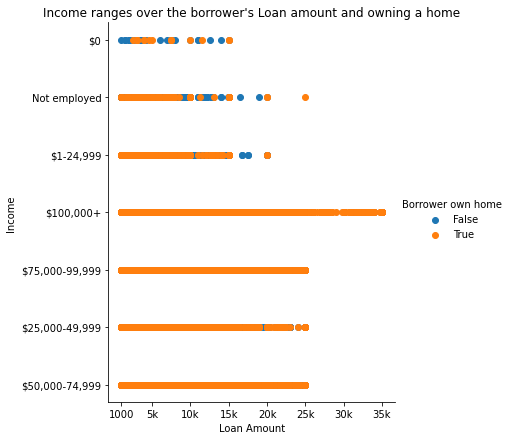

In [25]:
# Factors affected on the Loan Original Amount

g = sb.FacetGrid(data = df, hue = 'IsBorrowerHomeowner', size= 6)
g.map(plt.scatter,'LoanOriginalAmount', 'IncomeRange')
plt.xlabel('Loan Amount')
plt.ylabel('Income ')
plt.title("Income ranges over the borrower's Loan amount and owning a home")
plt.xticks([1000, 5e3, 10e3, 15e3, 2e4, 2.5e4, 3e4, 3.5e4], [1000, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
g.add_legend(title='Borrower own home');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The estimated return from the completed loans was higher for those had the loan over 60 and the same appeared for the chargedoff loans. For the current loans, the estimated return is Convergent for both terms 60 and 36. For loans that their final payment in progress gave lower estimated return than the completed and chargedoff loans.

The multivariate exploration here showed that there indeed is a positive effect of increased the loan term on estimated return.

Also for borrower owned a home and had high income those both made the loan amout higher.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it seem like there's an inverse relationship between Loan Amount and the Estimated Return which appeared when dicoved the income range: the higher income range the higher loan amount and the lower Estimated. Which mean that the lower amount of loan the higher estimated return will get.